# Smart Indexing - Deep Portfolio
## 1. Import libraries

In [1]:
#import the required packages

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as md
import matplotlib.pylab as pylab
import quandl
import pandas as pd
import copy
import numpy as np
from numpy import linalg as LA
import scipy as sp
import pandas_datareader.data as web
import datetime
from time import time
from collections import defaultdict

#Deep learn
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import sklearn.linear_model
import sklearn.metrics
import statsmodels.api as sm
from keras.layers import Input, Dense
from keras.models import Model, load_model
from keras import regularizers
from collections import defaultdict

#layout
import seaborn as sns
%matplotlib inline
matplotlib.rcParams[ 'figure.figsize' ] = ( 18, 7 )
plt.style.use('seaborn-darkgrid')


Using TensorFlow backend.


## 2. Import files

In [2]:
#Function to retrieve data
def GetData(fileName):
    return pd.read_csv(fileName, header=0,usecols=['Date','Adj Close'], parse_dates=True, index_col='Date').astype('float32').dropna()

In [3]:
data_ivv = GetData('Asset_Dataset/IVV.csv')
%store data_ivv

data_lqd = GetData('Asset_Dataset/LQD.csv')
%store data_lqd

data_shy = GetData('Asset_Dataset/SHY.csv')
%store data_shy

data_vnq = GetData('Asset_Dataset/VNQ.csv')
%store data_vnq

data_gld = GetData('Asset_Dataset/GLD.csv')
%store data_gld

data_efa = GetData('Asset_Dataset/EFA.csv')
%store data_efa

data_eem = GetData('Asset_Dataset/EEM.csv')
%store data_eem

data_emb = GetData('Asset_Dataset/EMB.csv')
%store data_emb

asset_table = pd.concat([data_ivv,data_lqd,data_shy,data_vnq,data_gld,data_efa,data_eem,data_emb],axis=1)
asset_table.columns = ['IVV close','LQD close','SHY close','VNQ close','GLD close','EFA close','EEM close','EMB close']
asset_table

Stored 'data_ivv' (DataFrame)
Stored 'data_lqd' (DataFrame)
Stored 'data_shy' (DataFrame)
Stored 'data_vnq' (DataFrame)
Stored 'data_gld' (DataFrame)
Stored 'data_efa' (DataFrame)
Stored 'data_eem' (DataFrame)
Stored 'data_emb' (DataFrame)


,IVV close,LQD close,SHY close,VNQ close,GLD close,EFA close,EEM close,EMB close
Date,,,,,,,,
2014-06-02,176.640778,99.253494,80.025215,60.854813,120.610001,59.333492,38.909019,89.811752
2014-06-09,175.508820,99.526405,79.980713,59.511181,122.959999,58.911022,38.953674,89.538589
2014-06-16,177.934479,99.593575,79.952293,60.478916,126.500000,59.612331,38.909019,89.390404
2014-06-23,177.215759,100.274048,80.028030,59.999039,126.660004,57.719608,38.721439,90.131355
2014-06-30,180.068802,99.064384,79.942871,60.243095,127.160004,59.925133,39.756630,89.296791
2014-07-07,178.615738,100.282692,80.032753,60.977665,128.779999,58.410130,39.513554,90.438179
2014-07-14,179.554382,100.442719,79.975937,61.801022,126.129997,58.765064,39.756630,90.211182
2014-07-21,179.617538,100.628067,79.994896,61.373192,125.790001,58.825665,40.314812,90.774689
2014-07-28,174.861084,100.088943,80.051704,60.315742,124.379997,57.250046,39.666599,88.700623


In [4]:
#net change
#def net_change(data):

data_ivv_net = data_ivv.diff().dropna()
data_lqd_net = data_lqd.diff().dropna()
data_shy_net = data_shy.diff().dropna()
data_vnq_net = data_vnq.diff().dropna()
data_gld_net = data_gld.diff().dropna()
data_efa_net = data_efa.diff().dropna()
data_eem_net = data_eem.diff().dropna()
data_emb_net = data_emb.diff().dropna()

#net value table
asset_net = pd.concat([data_ivv_net,data_lqd_net,data_shy_net,data_vnq_net,data_gld_net,data_efa_net,data_eem_net,data_emb_net],axis=1).astype('float32')
asset_net.columns = ['IVV net','LQD net','SHY net','VNQ net','GLD net','EFA net','EEM net','EMB net']
asset_net.to_csv('Asset_Dataset/asset_net.csv')




In [5]:
#def pct_change(data):

data_ivv_pct = data_ivv.pct_change().dropna()
data_lqd_pct = data_lqd.pct_change().dropna()
data_shy_pct = data_shy.pct_change().dropna()
data_vnq_pct = data_vnq.pct_change().dropna()
data_gld_pct = data_gld.pct_change().dropna()
data_efa_pct = data_efa.pct_change().dropna()
data_eem_pct = data_eem.pct_change().dropna()
data_emb_pct = data_emb.pct_change().dropna()

#pct table
asset_pct = pd.concat([data_ivv_pct,data_lqd_pct,data_shy_pct,data_vnq_pct,data_gld_pct,data_efa_pct,data_eem_pct,data_emb_pct],axis=1).astype('float32')
asset_pct.columns = ['IVV %','LQD %','SHY %','VNQ %','GLD %','EFA %','EEM %','EMB %']
asset_pct.to_csv('Asset_Dataset/asset_pct.csv')


In [6]:
np.shape(asset_table)

(261, 8)

In [7]:
#2 years for validation
#asset data
asset = defaultdict(defaultdict)

asset['calibrate']['close'] = asset_table.iloc[0:104, :]
asset['validate']['close'] = asset_table.iloc[104:, :]

In [8]:
asset['calibrate']['net'] = asset_net.iloc[0:104, :]
asset['validate']['net'] = asset_net.iloc[104:, :]

In [9]:
asset['calibrate']['pct'] = asset_pct.iloc[0:104, :]
asset['validate']['pct'] = asset_pct.iloc[104:, :]

In [10]:
#SP500 index data

data_SP = GetData('Asset_Dataset/GSPC.csv')

In [11]:
#SP500 net and pct change
SP500_net = data_SP.diff().dropna()
SP500_pct = data_SP.pct_change().dropna()


In [12]:
SP500 = pd.concat([data_SP,SP500_net,SP500_pct],axis=1).astype('float32').dropna()
SP500.columns = ['Adj Close','Change','% Change']
SP500.to_csv('Asset_Dataset/SP500.csv')


In [13]:
sp = defaultdict(defaultdict)

sp_close = SP500.iloc[:,0] # Series
sp['calibrate']['close'] = sp_close[0:104]
sp['validate']['close'] = sp_close[104:]

sp_net = SP500.iloc[:,1] # Series
sp['calibrate']['net'] = sp_net[0:104]
sp['validate']['net'] = sp_net[104:]

sp_pct = SP500.iloc[:,2] # Series
sp['calibrate']['pct'] = sp_pct[0:104]
sp['validate']['pct'] = sp_pct[104:]

## Step 1: Autoencoding
1. Train an auto encoding model compressing mkt info
2. Rank assets by 2-normal difference
3. Select a subset of the assets as the portfolio
4. Relu + linear as activation function

In [14]:
encoding_dim = 5 # 5 neurons
num_asset = len(asset_table.columns) # Use 8 stocks as features

In [16]:
# connect all layers
input_img = Input(shape=(num_asset, ))
encoded = Dense(encoding_dim, activation='relu', kernel_regularizer=regularizers.l2(0.01))(input_img)
decoded = Dense(num_asset, activation= 'linear', kernel_regularizer=regularizers.l2(0.01))(encoded) # see 'Stacked Auto-Encoders' in paper

In [17]:
# construct and compile AE model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='Adam', loss='mean_squared_error')

W0818 15:34:24.861306 4374820288 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [18]:
# train autoencoder
data_a = asset['calibrate']['net']
autoencoder.fit(data_a, data_a, shuffle=False, epochs=500, batch_size = 10)
autoencoder.save('model.csv')

W0818 15:34:25.917474 4374820288 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0818 15:34:25.965847 4374820288 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/500
104/104 [==============================] - 1s 7ms/step - loss: 4.7025
Epoch 2/500
104/104 [==============================] - 0s 142us/step - loss: 4.5027
Epoch 3/500
104/104 [==============================] - 0s 134us/step - loss: 4.3255
Epoch 4/500
104/104 [==============================] - 0s 140us/step - loss: 4.1654
Epoch 5/500
104/104 [==============================] - 0s 144us/step - loss: 4.0206
Epoch 6/500
104/104 [==============================] - 0s 151us/step - loss: 3.8896
Epoch 7/500
104/104 [==============================] - 0s 123us/step - loss: 3.7706
Epoch 8/500
104/104 [==============================] - 0s 117us/step - loss: 3.6620
Epoch 9/500
104/104 [==============================] - 0s 119us/step - loss: 3.5634
Epoch 10/500
104/104 [==============================] - 0s 111us/step - loss: 3.4714
Epoch 11/500
104/104 [==============================] - 0s 188us/step - loss: 3.3847
Epoch 12/500
104/104 [==============================] - 0s 122us/step - loss

104/104 [==============================] - 0s 108us/step - loss: 1.3073
Epoch 98/500
104/104 [==============================] - 0s 113us/step - loss: 1.3006
Epoch 99/500
104/104 [==============================] - 0s 94us/step - loss: 1.2938
Epoch 100/500
104/104 [==============================] - 0s 108us/step - loss: 1.2872
Epoch 101/500
104/104 [==============================] - 0s 117us/step - loss: 1.2806
Epoch 102/500
104/104 [==============================] - 0s 111us/step - loss: 1.2741
Epoch 103/500
104/104 [==============================] - 0s 107us/step - loss: 1.2676
Epoch 104/500
104/104 [==============================] - 0s 105us/step - loss: 1.2612
Epoch 105/500
104/104 [==============================] - 0s 105us/step - loss: 1.2547
Epoch 106/500
104/104 [==============================] - 0s 108us/step - loss: 1.2484
Epoch 107/500
104/104 [==============================] - 0s 114us/step - loss: 1.2420
Epoch 108/500
104/104 [==============================] - 0s 125us/step 

104/104 [==============================] - 0s 100us/step - loss: 0.7558
Epoch 193/500
104/104 [==============================] - 0s 111us/step - loss: 0.7473
Epoch 194/500
104/104 [==============================] - 0s 113us/step - loss: 0.7386
Epoch 195/500
104/104 [==============================] - 0s 102us/step - loss: 0.7298
Epoch 196/500
104/104 [==============================] - 0s 97us/step - loss: 0.7207
Epoch 197/500
104/104 [==============================] - 0s 126us/step - loss: 0.7113
Epoch 198/500
104/104 [==============================] - 0s 118us/step - loss: 0.7016
Epoch 199/500
104/104 [==============================] - 0s 122us/step - loss: 0.6917
Epoch 200/500
104/104 [==============================] - 0s 110us/step - loss: 0.6817
Epoch 201/500
104/104 [==============================] - 0s 118us/step - loss: 0.6715
Epoch 202/500
104/104 [==============================] - 0s 103us/step - loss: 0.6612
Epoch 203/500
104/104 [==============================] - 0s 100us/ste

104/104 [==============================] - 0s 100us/step - loss: 0.3304
Epoch 288/500
104/104 [==============================] - 0s 116us/step - loss: 0.3298
Epoch 289/500
104/104 [==============================] - 0s 113us/step - loss: 0.3292
Epoch 290/500
104/104 [==============================] - 0s 112us/step - loss: 0.3286
Epoch 291/500
104/104 [==============================] - 0s 102us/step - loss: 0.3280
Epoch 292/500
104/104 [==============================] - 0s 102us/step - loss: 0.3275
Epoch 293/500
104/104 [==============================] - 0s 102us/step - loss: 0.3269
Epoch 294/500
104/104 [==============================] - 0s 107us/step - loss: 0.3264
Epoch 295/500
104/104 [==============================] - 0s 104us/step - loss: 0.3259
Epoch 296/500
104/104 [==============================] - 0s 104us/step - loss: 0.3253
Epoch 297/500
104/104 [==============================] - 0s 108us/step - loss: 0.3248
Epoch 298/500
104/104 [==============================] - 0s 102us/st

104/104 [==============================] - 0s 100us/step - loss: 0.2937
Epoch 383/500
104/104 [==============================] - 0s 104us/step - loss: 0.2935
Epoch 384/500
104/104 [==============================] - 0s 104us/step - loss: 0.2932
Epoch 385/500
104/104 [==============================] - 0s 104us/step - loss: 0.2930
Epoch 386/500
104/104 [==============================] - 0s 104us/step - loss: 0.2928
Epoch 387/500
104/104 [==============================] - 0s 108us/step - loss: 0.2925
Epoch 388/500
104/104 [==============================] - 0s 111us/step - loss: 0.2923
Epoch 389/500
104/104 [==============================] - 0s 100us/step - loss: 0.2921
Epoch 390/500
104/104 [==============================] - 0s 108us/step - loss: 0.2919
Epoch 391/500
104/104 [==============================] - 0s 113us/step - loss: 0.2916
Epoch 392/500
104/104 [==============================] - 0s 104us/step - loss: 0.2914
Epoch 393/500
104/104 [==============================] - 0s 103us/st

104/104 [==============================] - 0s 107us/step - loss: 0.2744
Epoch 478/500
104/104 [==============================] - 0s 102us/step - loss: 0.2742
Epoch 479/500
104/104 [==============================] - 0s 106us/step - loss: 0.2741
Epoch 480/500
104/104 [==============================] - 0s 112us/step - loss: 0.2739
Epoch 481/500
104/104 [==============================] - 0s 109us/step - loss: 0.2737
Epoch 482/500
104/104 [==============================] - 0s 95us/step - loss: 0.2735
Epoch 483/500
104/104 [==============================] - 0s 109us/step - loss: 0.2734
Epoch 484/500
104/104 [==============================] - 0s 107us/step - loss: 0.2732
Epoch 485/500
104/104 [==============================] - 0s 98us/step - loss: 0.2730
Epoch 486/500
104/104 [==============================] - 0s 105us/step - loss: 0.2729
Epoch 487/500
104/104 [==============================] - 0s 107us/step - loss: 0.2727
Epoch 488/500
104/104 [==============================] - 0s 95us/step 

In [19]:
# test/reconstruct market information matrix
reconstruct = autoencoder.predict(data_a)

* Compute $||X - \hat{X}||$ as 2 norm difference
* The least 2 norm difference a stock has, the more important role it plays in the compressed market auto-encoder
* The paper says that, AMGN should be the best, and BCRX should be the worst. (But I didn't achieve this result.)

In [20]:
communal_information = []

for i in range(0,8):
    diff = LA.norm((data_a.iloc[:,i] - reconstruct[:,i])) # 2 norm difference
    communal_information.append(float(diff))
 
print("stock #, 2-norm, stock name")

ranking = np.array(communal_information).argsort()

for asset_index in ranking:
    print(asset_index, communal_information[asset_index], asset['calibrate']['net'].iloc[:,asset_index].name) 
    # print stock name from lowest different to highest


stock #, 2-norm, stock name
2 0.6971728801727295 SHY net
4 2.9260239601135254 GLD net
0 3.6231632232666016 IVV net
3 4.267111301422119 VNQ net
1 4.961801528930664 LQD net
5 4.965576171875 EFA net
6 5.200304985046387 EEM net
7 5.892167568206787 EMB net


In [21]:
# Analyze the extent of well-performance of the autoencoder
# on a particular asset

which_asset = 1

# now decoded last price plot
asset_autoencoder = copy.deepcopy(reconstruct[:, which_asset])
asset_autoencoder[0] = 0
asset_autoencoder = asset_autoencoder.cumsum()
asset_autoencoder += (asset['calibrate']['close'].iloc[0, which_asset])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


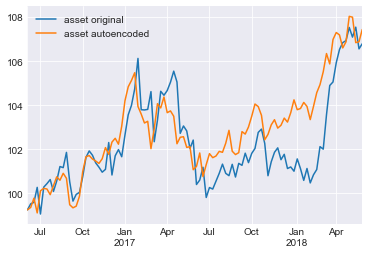

In [22]:
## plot for comparison
pd.Series(asset['calibrate']['close'].iloc[:, which_asset].as_matrix(), index=pd.date_range(start='2016-06-01', periods=104, freq='W')).plot(label='asset original', legend=True)
pd.Series(asset_autoencoder, index=pd.date_range(start='2016-06-01', periods = 104,freq='W')).plot(label='asset autoencoded', legend=True)

## Step 2: Calibrating

In [23]:
sp_predict = defaultdict(defaultdict)
total_2_norm_diff = defaultdict(defaultdict)
dl_scaler = defaultdict(StandardScaler)

In [37]:
for non_communal in [15, 35, 55]:  
    # some numerical values
    encoding_dim = 5
    s = non_communal +1
    asset_index = np.concatenate((ranking[0:7], ranking[-non_communal:])) # portfolio index
    
    
    # connect all layers
    input_img = Input(shape=(s,))
    encoded = Dense(encoding_dim, activation='relu', kernel_regularizer=regularizers.l2(0.01))(input_img)
    decoded = Dense(1, activation= 'linear', kernel_regularizer=regularizers.l2(0.01))(encoded)
    
    
    # construct and compile deep learning routine
    deep_learner = Model(input_img, decoded)
    deep_learner.compile(optimizer='Adam', loss='mean_squared_error')
    
    x = asset['calibrate']['pct'].iloc[:, asset_index]
    y = asset['calibrate']['pct']
    
    dl_scaler[s] = StandardScaler()       # Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data
    dl_scaler[s].fit(x)
    x = dl_scaler[s].transform(x)  
    
    deep_learner.fit(x, y, shuffle=False, epochs=100, batch_size = 3)    # fit the model
   # deep_learner.save(str + '.csv') # for validation phase use
    
    
    relative_pct = copy.deepcopy(deep_learner.predict(x))
    relative_pct[0] = 0
    relative_pct = (relative_percentage /100) +1
    
    sp_predict['calibrate'][s] = sp['calibrate']['close'][0] * (relative_percentage.cumprod())          
    total_2_norm_diff['calibrate'][s] = LA.norm((sp_predict['calibrate'][s] - sp['calibrate']['close']))

ValueError: Error when checking input: expected input_16 to have shape (16,) but got array with shape (15,)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


KeyError: 25

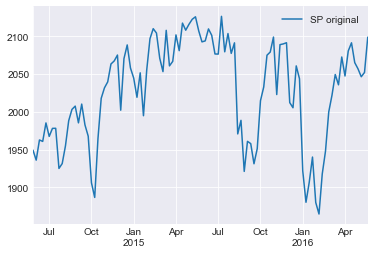

In [40]:
# plot results and 2-norm differences 
pd.Series(sp['calibrate']['close'].as_matrix(), index=pd.date_range(start='2014-06-01', periods=104, freq='W')).plot(label='SP original', legend=True)

for s in [25, 45, 65]:
    pd.Series(sp_predict['calibrate'][s], index=pd.date_range(start='2014-06-01', periods = 104,freq='W')).plot(label='SP S'+str(s), legend=True)
    print("S" +str(s) + " 2-norm difference: ", total_2_norm_diff['calibrate'][s])

In [53]:
###Validating###
###

In [ ]:
for non_communal in [15, 35, 55]:  
    # some numerical values
    encoding_dim = 5
    s = 10 + non_communal
    asset_index = np.concatenate((ranking[0:10], ranking[-non_communal:])) # portfolio index
    
    # load our trained models
    deep_learner = load_model('model/retrack_s' + str(s) + '.h5')
    
    
    x = asset['validate']['pct'].iloc[:, stock_index]
    x = dl_scaler[s].transform(x)  
    
    # is it good?
    relative_percentage = copy.deepcopy(deep_learner.predict(x))
    relative_percentage[0] = 0
    relative_percentage = (relative_percentage /100) + 1
    
    ibb_predict['validate'][s] = ibb['validate']['lp'][0] * (relative_percentage.cumprod())          
    total_2_norm_diff['validate'][s] = np.linalg.norm((ibb_predict['validate'][s] - ibb['validate']['lp']))